In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [32]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [3]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temp_cuts.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_temp_cuts.csv')
#'/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv' has the calculated heating rates already!
#('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv') has calcualted heating_rates for candidates

#latest version of lists are candidates_temp_cuts.csv

In [4]:
print(len(confirmed))
print(len(candidates))

6
35


In [4]:
#candidates

In [5]:
#confirmed

Load up various mass radius planet models from here: https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrrelation

In [7]:
Pure_iron = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_iron.csv',delim_whitespace=True)
rocky_earth = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/earth_like_rocky.csv',delim_whitespace=True)
pure_rock= pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_rock.csv',delim_whitespace=True)
h2o_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_300k.csv',delim_whitespace=True)

In [8]:
h20_mix_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_mix_300k.csv',delim_whitespace=True)

## Sample by Discovery 

In [9]:
print(len(candidates))
print(len(confirmed))

35
6


Temperature cuts; we only want planets with effective temperatures < 255 K (frozen surface)

In [105]:
#temp_cand_lim = candidates[(candidates['T_eff'].values < 255)]
#temp_conf_lim = confirmed[(confirmed['T_eff'].values < 255)]

In [107]:
#len(temp_cand_lim)

35

In [108]:
#len(temp_conf_lim)

6

In [109]:
#temp_cand_lim.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temp_cuts.csv')
#temp_conf_lim.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_temp_cuts.csv')

Planetary Models

(0.5, 50.0)

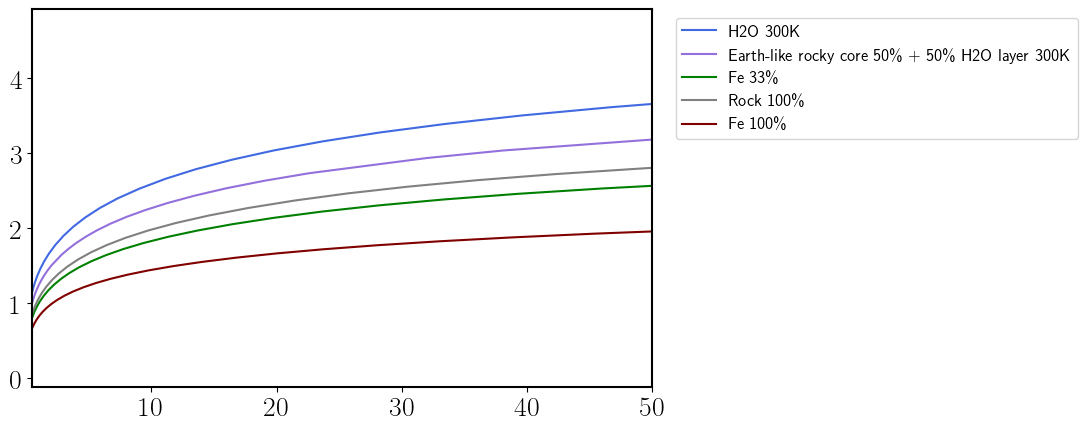

In [51]:
#planet models
plt.plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
plt.plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')
plt.plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
plt.plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
plt.plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')

plt.legend( bbox_to_anchor=(1,.5,.7,.5),fontsize = 12)
plt.xlim(0.5,50)
#plt.xscale('linear')

### Mass v Radius

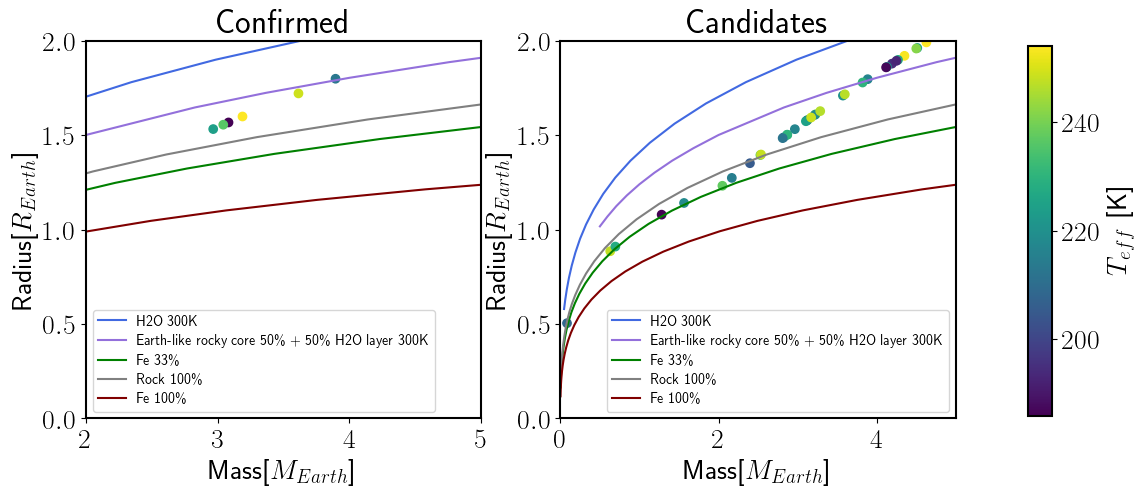

In [52]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

#planet models
axs[0].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[0].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')
axs[0].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[0].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[0].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')

#data
axs[0].scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)

#setting plot labels
axs[0].set_xlim(2,5)
axs[0].set_ylim(0,2)
axs[0].set_ylabel('Radius[$R_{Earth}$]')
axs[0].set_xlabel('Mass[$M_{Earth}$]')
axs[0].set_title("Confirmed")
axs[0].legend(fontsize=10)

#data part 2
axs[1].scatter(candidates['masse_est'],candidates['Radius'],c=candidates['T_eff'].values)

#planet models
axs[1].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[1].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')
axs[1].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[1].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[1].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')

#plot labels
axs[1].set_xlim(0,5)
axs[1].set_ylim(0,2)
axs[1].set_xlabel('Mass[$M_{Earth}$]')
axs[1].set_ylabel('Radius[$R_{Earth}$]')
axs[1].set_title("Candidates")
axs[1].legend(fontsize=10)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.91, 0.13, 0.02, 0.74])
s = plt.scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)
fig.colorbar(s, cax=cbar_ax,label='$T_{eff}$ [K]')

Text(0.5, 1.0, 'Confirmed Planets')

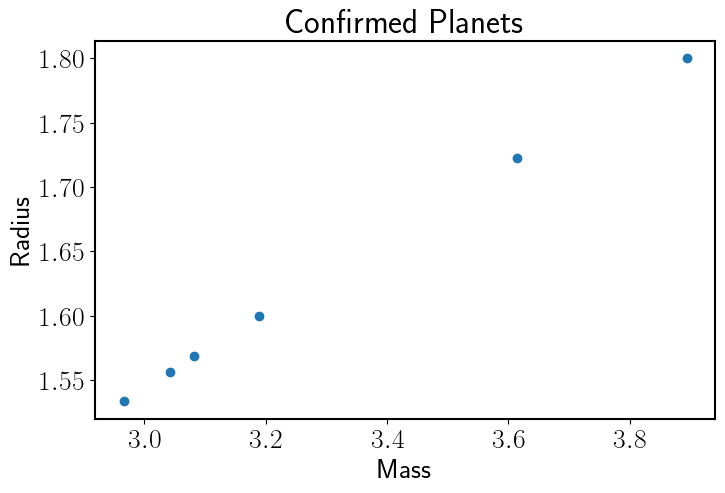

In [12]:
plt.scatter(confirmed['masse_est'],confirmed['rade'])


plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

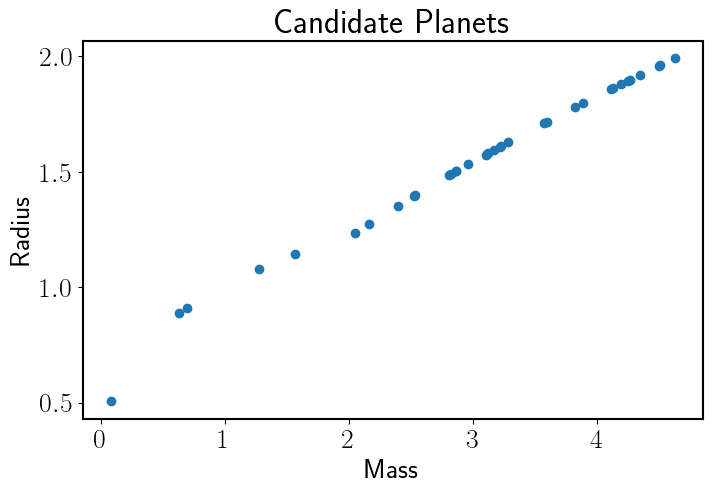

In [13]:
plt.scatter(candidates['masse_est'],candidates['Radius'])
plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Candidate Planets')

### Insolation v Radius

Text(0.5, 1.0, 'Candidate Planets')

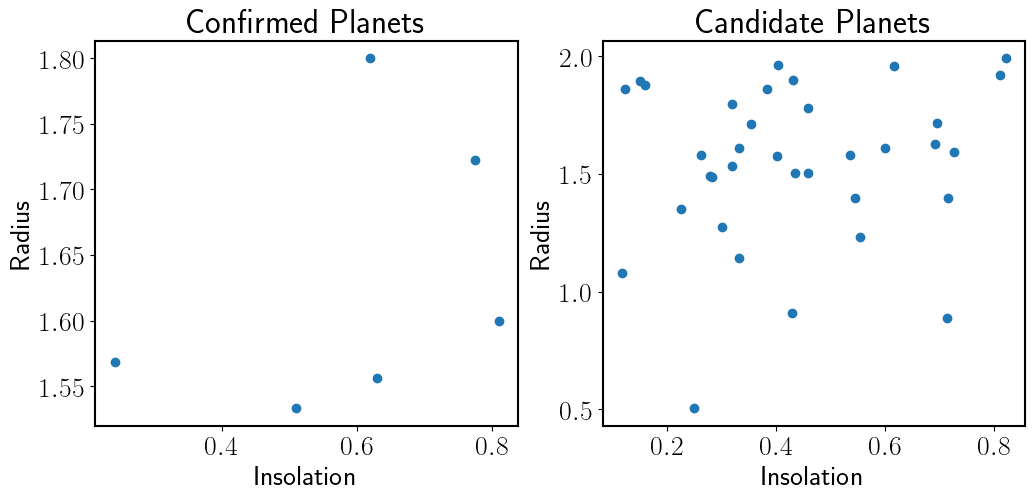

In [5]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

axs[0].scatter(confirmed['insol'],confirmed['rade'])
axs[0].set_xlabel('Insolation')
axs[0].set_ylabel('Radius')
axs[0].set_title('Confirmed Planets')

axs[1].scatter(candidates['Insolation'],candidates['Radius'])
axs[1].set_xlabel('Insolation')
axs[1].set_ylabel('Radius')
axs[1].set_title('Candidate Planets')

### Insolation v Mass

In [14]:
conf_kepler_= confirmed[confirmed["discoverymethod"].str.contains("Kepler")]
conf_tess_ = confirmed[confirmed["discoverymethod"].str.contains("TESS")]
conf_k2_ = confirmed[confirmed["discoverymethod"].str.contains("K2")]

cand_kepler_ = candidates[candidates["Discovery"].str.contains("Kepler")]
cand_tess_ = candidates[candidates["Discovery"].str.contains("TESS")]
cand_k2_ = candidates[candidates["Discovery"].str.contains("K2")]

Text(0.5, 1.0, 'Candidate Planets')

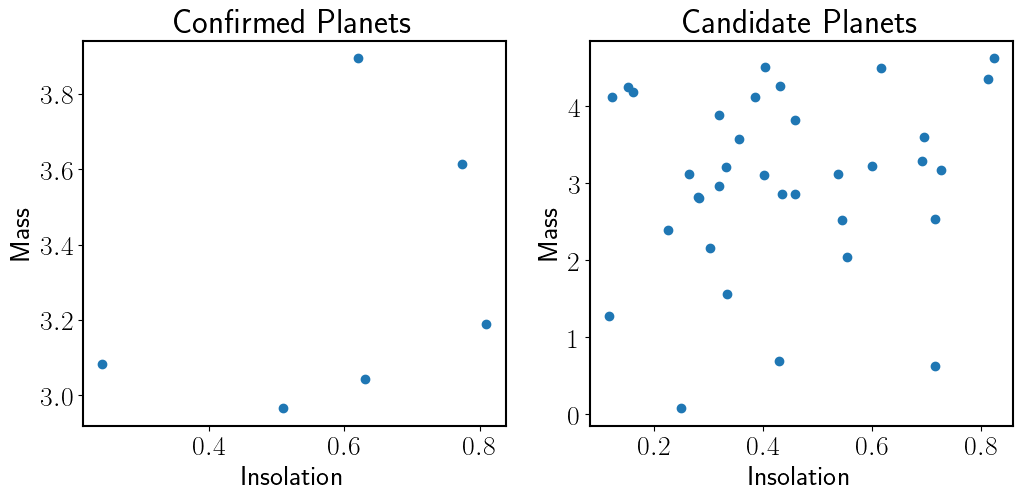

In [15]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

axs[0].scatter(confirmed['insol'],confirmed['masse_est'])
axs[0].set_xlabel('Insolation')
axs[0].set_ylabel('Mass')
axs[0].set_title('Confirmed Planets')

axs[1].scatter(candidates['Insolation'],candidates['masse_est'])
axs[1].set_xlabel('Insolation')
axs[1].set_ylabel('Mass')
axs[1].set_title('Candidate Planets')


#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/insol_radii_final.pdf',bbox_inches='tight')

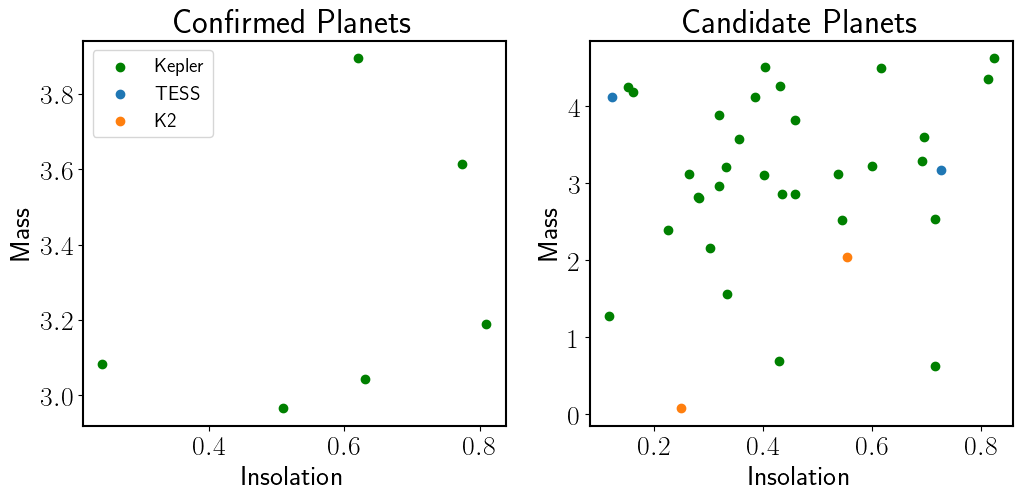

In [23]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

axs[0].scatter(conf_kepler_['insol'],conf_kepler_['masse_est'],label='Kepler',color='green')
axs[0].scatter(conf_tess_['insol'],conf_tess_['masse_est'],label='TESS',color='C0')
axs[0].scatter(conf_k2_['insol'],conf_k2_['masse_est'],label='K2',color='C1')

axs[0].set_xlabel('Insolation')
axs[0].set_ylabel('Mass')
axs[0].set_title('Confirmed Planets')
axs[0].legend(fontsize=14,loc='upper left')

axs[1].scatter(cand_kepler_['Insolation'],cand_kepler_['masse_est'],label='Kepler',color='green')
axs[1].scatter(cand_tess_['Insolation'],cand_tess_['masse_est'],label='TESS',color='C0')
axs[1].scatter(cand_k2_['Insolation'],cand_k2_['masse_est'],label='K2',color='C1')
axs[1].set_xlabel('Insolation')
axs[1].set_ylabel('Mass')
axs[1].set_title('Candidate Planets')
#axs[1].legend(fontsize=12)


#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/insol_radii_final.pdf',bbox_inches='tight')

### Surface Area/volume ratio versus H_Total

Need to include Earth, Europa, and Enceladus (they set upper lim bounds, form a line)
- worlds that fall on or above that line are very geologically acitve

Plot Titan, Ganymede, and Triton (lower lim)
- worlds on or above this line will be active but more subdued

In [25]:
cand_rad_m = (candidates['Radius'].values*u.R_earth).to(u.m)
conf_rad_m = (confirmed['rade'].values*u.R_earth).to(u.m)

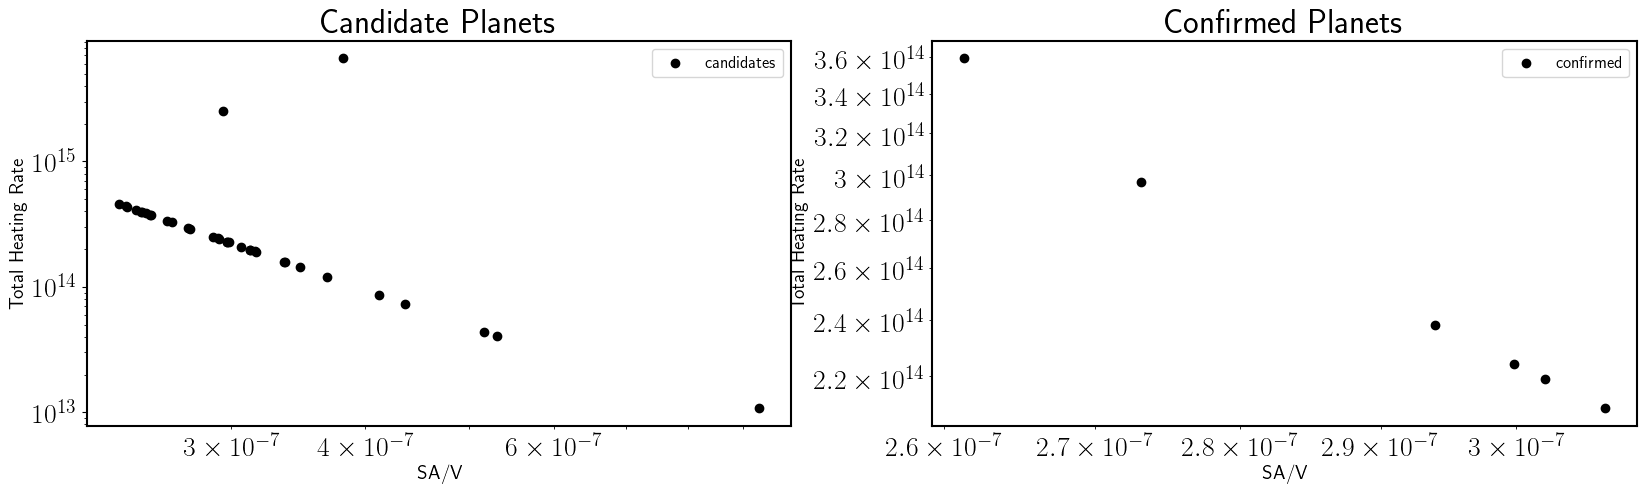

In [26]:
fig, axs = plt.subplots(1,2, figsize=(20,5), facecolor='w', edgecolor='k')

axs[0].scatter((3/cand_rad_m),candidates['H_Total'],color='k',label = 'candidates')
axs[0].set_xlabel('SA/V',fontsize=14)
axs[0].set_ylabel('Total Heating Rate',fontsize=14)
axs[0].set_title('Candidate Planets')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(fontsize=12)



axs[1].scatter((3/conf_rad_m),confirmed['H_Total'],color='k',label='confirmed')
axs[1].set_xlabel('SA/V',fontsize=14)
axs[1].set_ylabel('Total Heating Rate',fontsize=14)
axs[1].set_title('Confirmed Planets')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(fontsize=12)

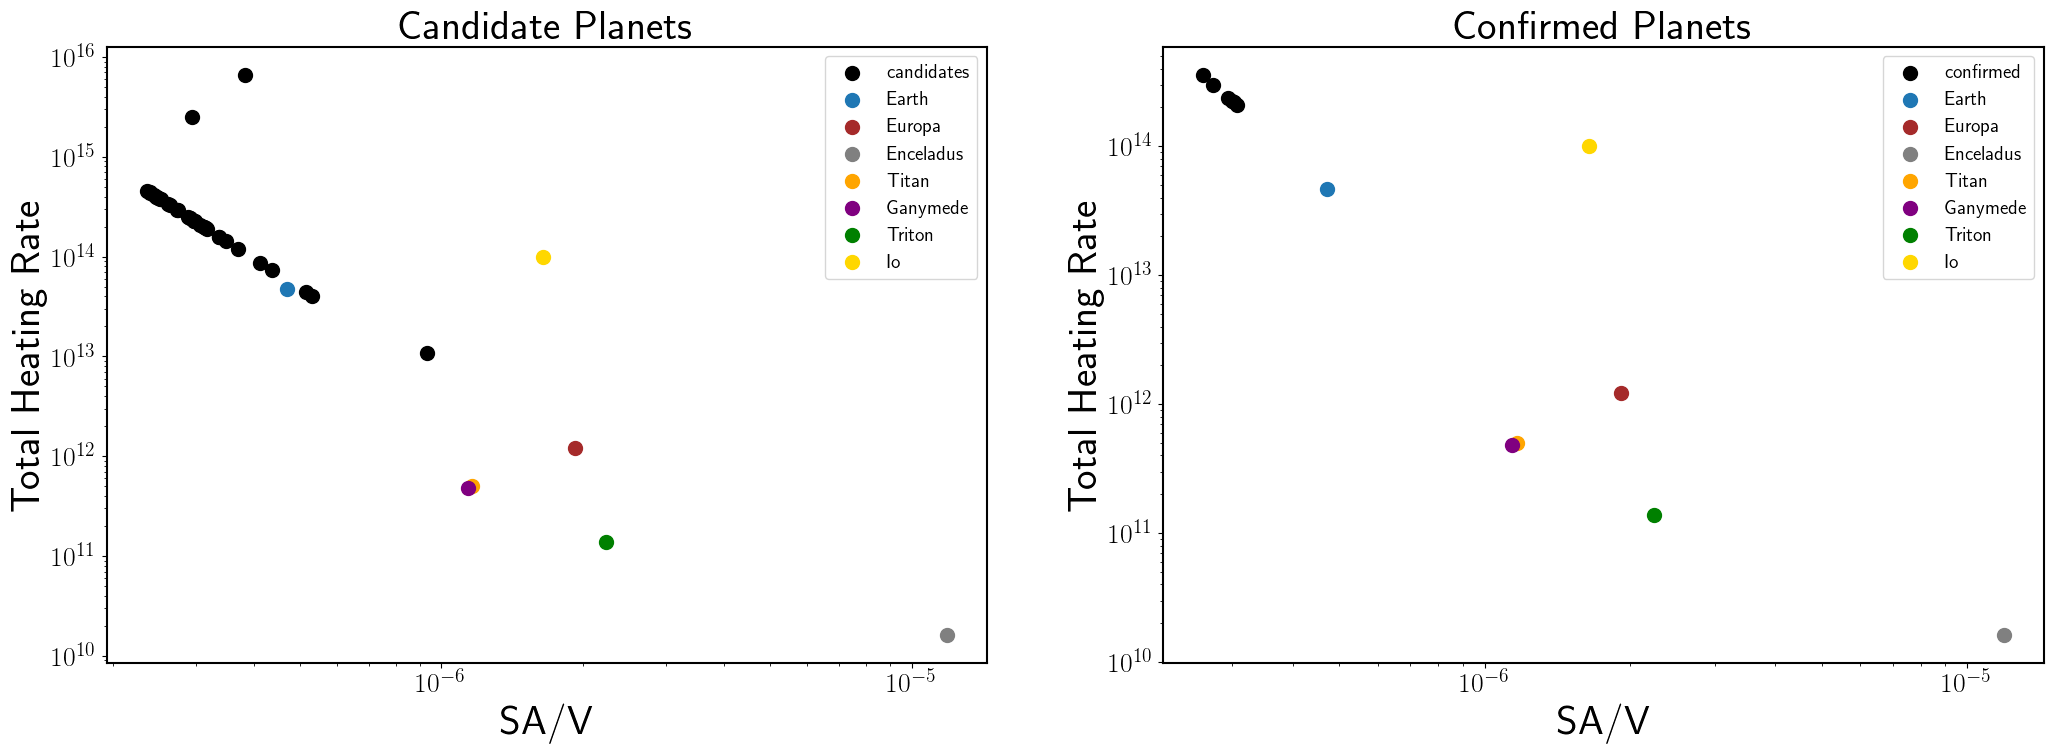

In [48]:
fig, axs = plt.subplots(1,2, figsize=(25,8), facecolor='w', edgecolor='k')

axs[0].scatter((3/cand_rad_m),candidates['H_Total'],color='k',label = 'candidates', s=100)

#Earth
axs[0].scatter((3/((1*u.R_earth).to(u.m))), 4.7e13,color='C0',label='Earth' , s=100)

#Europa
axs[0].scatter((3/((0.245*u.R_earth).to(u.m))), 1.21e12,color='brown',label='Europa', s=100 )

#Enceladus
axs[0].scatter((3/((0.0395*u.R_earth).to(u.m))), 1.63e10,color='grey',label='Enceladus', s=100 )

#Titan
axs[0].scatter((3/((0.404*u.R_earth).to(u.m))), 4.99e11,color='orange',label='Titan', s=100 )

#Ganymede
axs[0].scatter((3/((0.413*u.R_earth).to(u.m))), 4.78e11,color='purple',label='Ganymede', s=100 )

#Triton
axs[0].scatter((3/((0.21*u.R_earth).to(u.m))), 1.37e11,color='green',label='Triton', s=100 )

#Io
axs[0].scatter((3/((0.286*u.R_earth).to(u.m))), 1e14,color='gold',label='Io' , s=100)

axs[0].set_xlabel('SA/V',fontsize=30)
axs[0].set_ylabel('Total Heating Rate',fontsize=30)
axs[0].set_title('Candidate Planets',fontsize=30)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(fontsize=14)



axs[1].scatter((3/conf_rad_m),confirmed['H_Total'],color='k',label='confirmed', s=100)

#Earth
axs[1].scatter((3/((1*u.R_earth).to(u.m))), 4.7e13,color='C0',label='Earth' , s=100)

#Europa
axs[1].scatter((3/((0.245*u.R_earth).to(u.m))), 1.21e12,color='brown',label='Europa' , s=100)

#Enceladus
axs[1].scatter((3/((0.0395*u.R_earth).to(u.m))), 1.63e10,color='grey',label='Enceladus' , s=100)

#Titan
axs[1].scatter((3/((0.404*u.R_earth).to(u.m))), 4.99e11,color='orange',label='Titan' , s=100)

#Ganymede
axs[1].scatter((3/((0.413*u.R_earth).to(u.m))), 4.78e11,color='purple',label='Ganymede' , s=100)

#Triton
axs[1].scatter((3/((0.21*u.R_earth).to(u.m))), 1.37e11,color='green',label='Triton' , s=100)

#Io
axs[1].scatter((3/((0.286*u.R_earth).to(u.m))), 1e14,color='gold',label='Io' , s=100)


axs[1].set_xlabel('SA/V',fontsize=30)
axs[1].set_ylabel('Total Heating Rate',fontsize=30)
axs[1].set_title('Confirmed Planets',fontsize=30)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend(fontsize=14)


#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/total_heating.pdf',bbox_inches='tight')

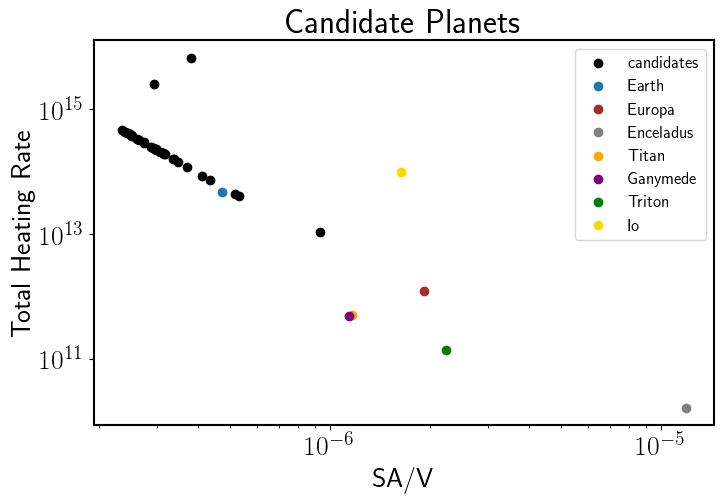

In [50]:
plt.scatter((3/cand_rad_m),candidates['H_Total'],color='k',label = 'candidates')


#Earth
plt.scatter((3/((1*u.R_earth).to(u.m))), 4.7e13,color='C0',label='Earth' )

#Europa
plt.scatter((3/((0.245*u.R_earth).to(u.m))), 1.21e12,color='brown',label='Europa' )

#Enceladus
plt.scatter((3/((0.0395*u.R_earth).to(u.m))), 1.63e10,color='grey',label='Enceladus' )

#Titan
plt.scatter((3/((0.404*u.R_earth).to(u.m))), 4.99e11,color='orange',label='Titan' )

#Ganymede
plt.scatter((3/((0.413*u.R_earth).to(u.m))), 4.78e11,color='purple',label='Ganymede' )

#Triton
plt.scatter((3/((0.21*u.R_earth).to(u.m))), 1.37e11,color='green',label='Triton' )

#Io
plt.scatter((3/((0.286*u.R_earth).to(u.m))), 1e14,color='gold',label='Io' )


plt.xlabel('SA/V')
plt.ylabel('Total Heating Rate')
plt.title('Candidate Planets')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/total_heating_candidates.pdf',bbox_inches='tight')

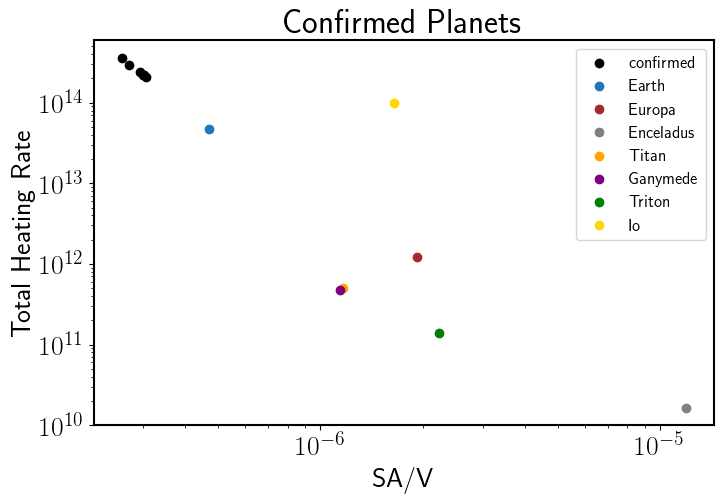

In [51]:
conf_rad_m = (confirmed['rade'].values*u.R_earth).to(u.m)
plt.scatter((3/conf_rad_m),confirmed['H_Total'],color='k',label='confirmed')

#Earth
plt.scatter((3/((1*u.R_earth).to(u.m))), 4.7e13,color='C0',label='Earth' )

#Europa
plt.scatter((3/((0.245*u.R_earth).to(u.m))), 1.21e12,color='brown',label='Europa' )

#Enceladus
plt.scatter((3/((0.0395*u.R_earth).to(u.m))), 1.63e10,color='grey',label='Enceladus' )

#Titan
plt.scatter((3/((0.404*u.R_earth).to(u.m))), 4.99e11,color='orange',label='Titan' )

#Ganymede
plt.scatter((3/((0.413*u.R_earth).to(u.m))), 4.78e11,color='purple',label='Ganymede' )

#Triton
plt.scatter((3/((0.21*u.R_earth).to(u.m))), 1.37e11,color='green',label='Triton' )

#Io
plt.scatter((3/((0.286*u.R_earth).to(u.m))), 1e14,color='gold',label='Io' )



plt.xlabel('SA/V')
plt.ylabel('Total Heating Rate')
plt.title('Confirmed Planets')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=12)

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/total_heating_confirmed.pdf',bbox_inches='tight')

In [53]:
confirmed

,Unnamed: 0,name,hostname,insol,period,T_eff,rade,semi_au,masse_est,eccen,st_log_lum,discoverymethod,H_Tidal,H_Radio,H_Total
0,2,Kepler-1544 b,Kepler-1544,0.774587,168.811174,248.740874,1.722270,0.539467,3.613241,0.00,-0.647,Kepler,0.000000e+00,2.966220e+14,2.966220e+14
1,4,Kepler-296 f,Kepler-296,0.620000,63.336270,212.794092,1.800000,0.255000,3.894446,0.33,-1.569,Kepler,2.045600e+13,3.386230e+14,3.590790e+14
2,6,Kepler-62 f,Kepler-62,0.509360,267.291000,223.993704,1.533375,0.722749,2.966459,0.00,-0.575,Kepler,0.000000e+00,2.093360e+14,2.093360e+14
3,8,Kepler-1652 b,Kepler-1652,0.810000,38.097220,253.928767,1.600000,0.165400,3.188594,0.00,-1.638,Kepler,0.000000e+00,2.378260e+14,2.378260e+14
4,9,Kepler-441 b,Kepler-441,0.241811,207.248200,185.929645,1.568436,0.558807,3.082536,0.10,-1.122,Kepler,2.515201e+09,2.240270e+14,2.240290e+14
5,10,Kepler-1229 b,Kepler-1229,0.629999,86.828989,236.218911,1.556471,0.315740,3.042715,0.00,-1.202,Kepler,0.000000e+00,2.189380e+14,2.189380e+14


In [92]:
import matplotlib.cm as cm

In [105]:
import itertools

In [112]:
len(confirmed['H_Total'].values)

6

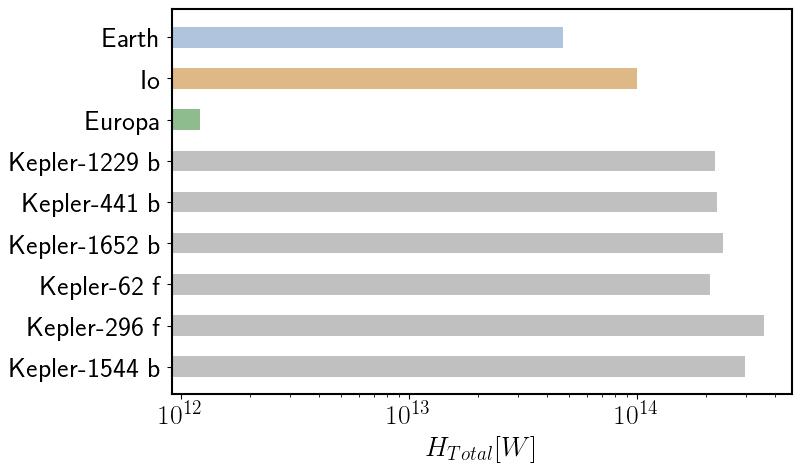

In [130]:
#color = iter(cm.viridis(np.linspace(0,len(confirmed['name'].values))))

xconf =confirmed['name'].values
yconf=confirmed['H_Total'].values

plt.barh(xconf,yconf,height=0.5,color='silver')

plt.barh('Europa', 1.21e12,color='darkseagreen',height=0.5)
plt.barh('Io', 1e14,color='burlywood',height=0.5)
plt.barh('Earth', 4.7e13,color='lightsteelblue',height=0.5)

plt.xscale('log')
plt.xlabel('$H_{Total} [W]$')

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/total_heating_bar_graph.pdf',bbox_inches='tight')

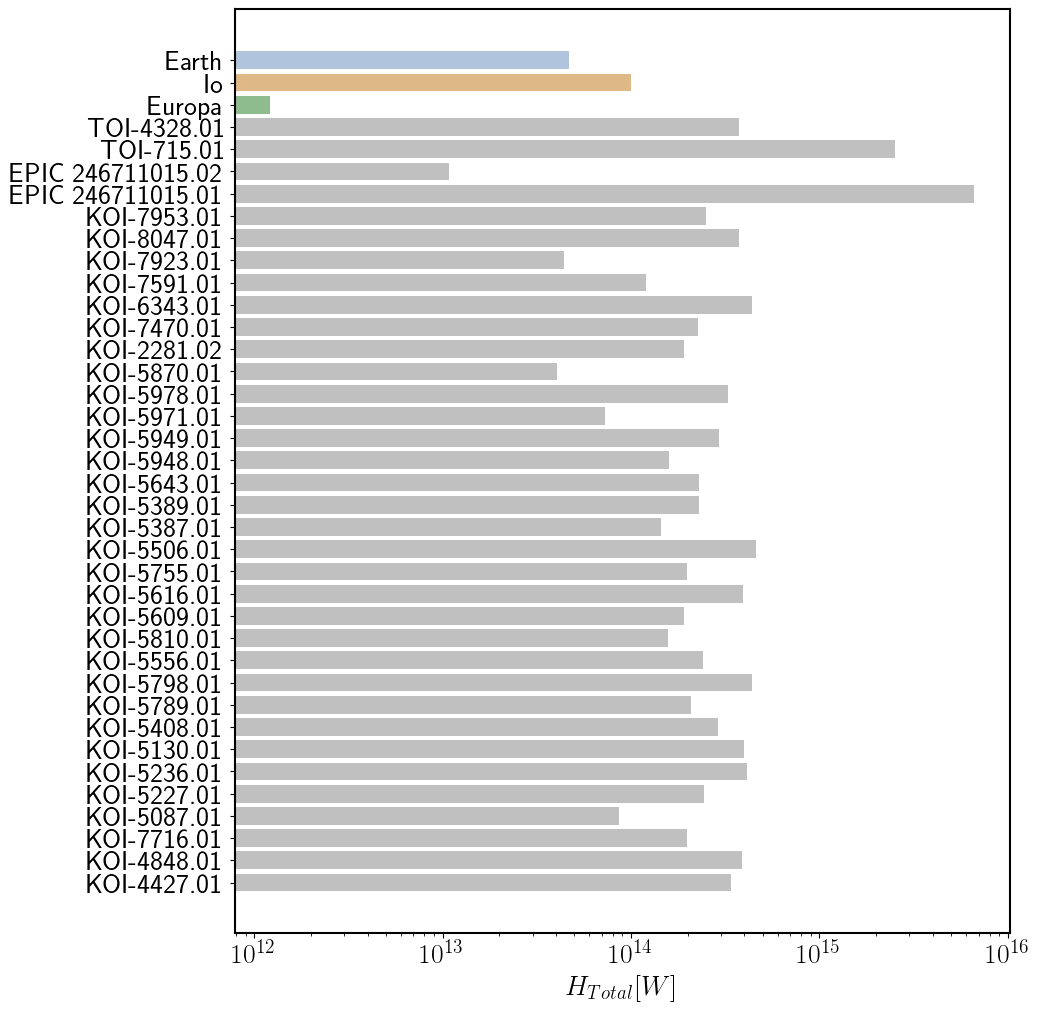

In [145]:
#color = iter(cm.viridis(np.linspace(0,len(confirmed['name'].values))))
plt.figure(figsize=[10,12])
xcand =candidates['name'].values
ycand=candidates['H_Total'].values

plt.barh(xcand,ycand,height=0.8,color='silver')

plt.barh('Europa', 1.21e12,color='darkseagreen',height=0.8)
plt.barh('Io', 1e14,color='burlywood',height=0.8)
plt.barh('Earth', 4.7e13,color='lightsteelblue',height=0.8)

plt.xscale('log')
plt.xlabel('$H_{Total} [W]$')

#plt.savefig('/Users/lupitatovar/Cool-Worlds/figures/total_heating_bar_graph_cand.pdf',bbox_inches='tight')

In [ ]:
plt.barh()